Temprature Analysis

In [170]:
import pandas as pd
import datetime

df = pd.read_csv('data/temp-data.csv')

In [171]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [172]:
df.describe(include='all')

,id,room_id/id,noted_date,temp,out/in
count,97606,97606,97606,97606.000000,97606
unique,97605,1,27920,NaN,2
top,__export__.temp_log_196108_4a983c7e,Room Admin,12-09-2018 03:09,NaN,Out
freq,2,97606,65,NaN,77261
mean,NaN,NaN,NaN,35.053931,NaN
std,NaN,NaN,NaN,5.699825,NaN
min,NaN,NaN,NaN,21.000000,NaN
25%,NaN,NaN,NaN,30.000000,NaN
50%,NaN,NaN,NaN,35.000000,NaN
75%,NaN,NaN,NaN,40.000000,NaN


In [173]:
#seperating date and time
date = df["noted_date"].str.split(' ', n=1, expand=True)
df["date"] = date[0]
df["time"] = date[1]

#extracting months from date
month = df["date"].str.split('-', n=2, expand=True)
df["month"] = month[1]
df["date"] = month[0]

#deducing day_time from time
def getTime(time):
  local_time = int(time.split(':')[0])

  if (local_time>=6 and local_time<=18):
    return 'Day'
  else:
    return 'Night'

df["day_time"] = df.apply(lambda row: getTime(row["time"]), axis=1)

def parse_date(date):
    return datetime.datetime.strptime(date, '%d-%m-%Y %H:%M')

df['updated_date'] = df.apply(lambda row: parse_date(row["noted_date"]), axis=1)

#dropping duplicates value on the basis of time, temprature, out/in
df.drop_duplicates(subset=['updated_date', 'temp', 'out/in'], keep=False, inplace=True)
df

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date
38,__export__.temp_log_196039_a167c302,Room Admin,08-12-2018 09:05,29,In,08,09:05,12,Day,2018-12-08 09:05:00
39,__export__.temp_log_196038_b58a003f,Room Admin,08-12-2018 09:04,42,Out,08,09:04,12,Day,2018-12-08 09:04:00
40,__export__.temp_log_196037_fdf98314,Room Admin,08-12-2018 09:04,30,In,08,09:04,12,Day,2018-12-08 09:04:00
41,__export__.temp_log_196035_689daecd,Room Admin,08-12-2018 09:04,29,In,08,09:04,12,Day,2018-12-08 09:04:00
42,__export__.temp_log_196034_d592acf9,Room Admin,08-12-2018 09:03,42,Out,08,09:03,12,Day,2018-12-08 09:03:00
...,...,...,...,...,...,...,...,...,...,...
97565,__export__.temp_log_114516_38f9fcc0,Room Admin,28-07-2018 07:15,32,Out,28,07:15,07,Day,2018-07-28 07:15:00
97568,__export__.temp_log_87925_41f1e6d9,Room Admin,28-07-2018 07:10,31,In,28,07:10,07,Day,2018-07-28 07:10:00
97569,__export__.temp_log_148010_12bbd064,Room Admin,28-07-2018 07:09,32,Out,28,07:09,07,Day,2018-07-28 07:09:00
97570,__export__.temp_log_98383_615cf2dc,Room Admin,28-07-2018 07:09,33,Out,28,07:09,07,Day,2018-07-28 07:09:00


Finding outliers with z score

For month 12

In [177]:
month_12 = df[df['month'] == '12']
month_12

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date
38,__export__.temp_log_196039_a167c302,Room Admin,08-12-2018 09:05,29,In,08,09:05,12,Day,2018-12-08 09:05:00
39,__export__.temp_log_196038_b58a003f,Room Admin,08-12-2018 09:04,42,Out,08,09:04,12,Day,2018-12-08 09:04:00
40,__export__.temp_log_196037_fdf98314,Room Admin,08-12-2018 09:04,30,In,08,09:04,12,Day,2018-12-08 09:04:00
41,__export__.temp_log_196035_689daecd,Room Admin,08-12-2018 09:04,29,In,08,09:04,12,Day,2018-12-08 09:04:00
42,__export__.temp_log_196034_d592acf9,Room Admin,08-12-2018 09:03,42,Out,08,09:03,12,Day,2018-12-08 09:03:00
...,...,...,...,...,...,...,...,...,...,...
5855,__export__.temp_log_176748_60bb11e0,Room Admin,03-12-2018 07:05,26,In,03,07:05,12,Day,2018-12-03 07:05:00
6202,__export__.temp_log_175726_bb4d36c3,Room Admin,02-12-2018 19:55,38,Out,02,19:55,12,Night,2018-12-02 19:55:00
6203,__export__.temp_log_175727_4ebae5c4,Room Admin,02-12-2018 19:54,38,Out,02,19:54,12,Night,2018-12-02 19:54:00
6206,__export__.temp_log_175716_a92efecb,Room Admin,02-12-2018 19:51,38,Out,02,19:51,12,Night,2018-12-02 19:51:00


In [178]:
month_12['temp'].mean()

34.19786096256684

In [179]:
month_12['temp'].std()

4.896066782947635

In [180]:
month_12

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date
38,__export__.temp_log_196039_a167c302,Room Admin,08-12-2018 09:05,29,In,08,09:05,12,Day,2018-12-08 09:05:00
39,__export__.temp_log_196038_b58a003f,Room Admin,08-12-2018 09:04,42,Out,08,09:04,12,Day,2018-12-08 09:04:00
40,__export__.temp_log_196037_fdf98314,Room Admin,08-12-2018 09:04,30,In,08,09:04,12,Day,2018-12-08 09:04:00
41,__export__.temp_log_196035_689daecd,Room Admin,08-12-2018 09:04,29,In,08,09:04,12,Day,2018-12-08 09:04:00
42,__export__.temp_log_196034_d592acf9,Room Admin,08-12-2018 09:03,42,Out,08,09:03,12,Day,2018-12-08 09:03:00
...,...,...,...,...,...,...,...,...,...,...
5855,__export__.temp_log_176748_60bb11e0,Room Admin,03-12-2018 07:05,26,In,03,07:05,12,Day,2018-12-03 07:05:00
6202,__export__.temp_log_175726_bb4d36c3,Room Admin,02-12-2018 19:55,38,Out,02,19:55,12,Night,2018-12-02 19:55:00
6203,__export__.temp_log_175727_4ebae5c4,Room Admin,02-12-2018 19:54,38,Out,02,19:54,12,Night,2018-12-02 19:54:00
6206,__export__.temp_log_175716_a92efecb,Room Admin,02-12-2018 19:51,38,Out,02,19:51,12,Night,2018-12-02 19:51:00


In [181]:
month_12['z_score'] = (month_12['temp'] - month_12['temp'].mean())/month_12['temp'].std()

<ipython-input-181-b8e7367a5c2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_12['z_score'] = (month_12['temp'] - month_12['temp'].mean())/month_12['temp'].std()


<AxesSubplot:>

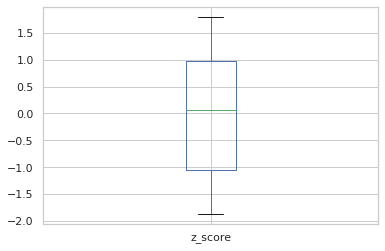

In [218]:
month_12.plot('temp', kind='box')
#cannot find any outlier values

For month 11

In [183]:
month_11 = df[df['month'] == '11']
month_11

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date
7970,__export__.temp_log_170481_6f15e6b9,Room Admin,30-11-2018 08:18,41,Out,30,08:18,11,Day,2018-11-30 08:18:00
7971,__export__.temp_log_170480_08363709,Room Admin,30-11-2018 08:17,41,Out,30,08:17,11,Day,2018-11-30 08:17:00
7972,__export__.temp_log_170473_a23a18ab,Room Admin,30-11-2018 08:16,42,Out,30,08:16,11,Day,2018-11-30 08:16:00
7973,__export__.temp_log_170472_171efaaa,Room Admin,30-11-2018 08:15,42,Out,30,08:15,11,Day,2018-11-30 08:15:00
8534,__export__.temp_log_168794_2e630db6,Room Admin,29-11-2018 13:46,40,Out,29,13:46,11,Day,2018-11-29 13:46:00
...,...,...,...,...,...,...,...,...,...,...
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,01-11-2018 00:23,40,Out,01,00:23,11,Night,2018-11-01 00:23:00
16215,__export__.temp_log_147650_344507e9,Room Admin,01-11-2018 00:13,40,Out,01,00:13,11,Night,2018-11-01 00:13:00
16216,__export__.temp_log_111262_7b3ed086,Room Admin,01-11-2018 00:09,39,Out,01,00:09,11,Night,2018-11-01 00:09:00
16217,__export__.temp_log_146101_e61c18d4,Room Admin,01-11-2018 00:07,40,Out,01,00:07,11,Night,2018-11-01 00:07:00


In [184]:
month_11['temp'].std()

4.799734124568918

In [185]:
month_11['temp'].mean()

39.4267578125

In [186]:
month_11['z_score'] = (month_11['temp'] - month_11['temp'].mean())/month_11['temp'].std()

<ipython-input-186-962de077b3ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_11['z_score'] = (month_11['temp'] - month_11['temp'].mean())/month_11['temp'].std()


<AxesSubplot:>

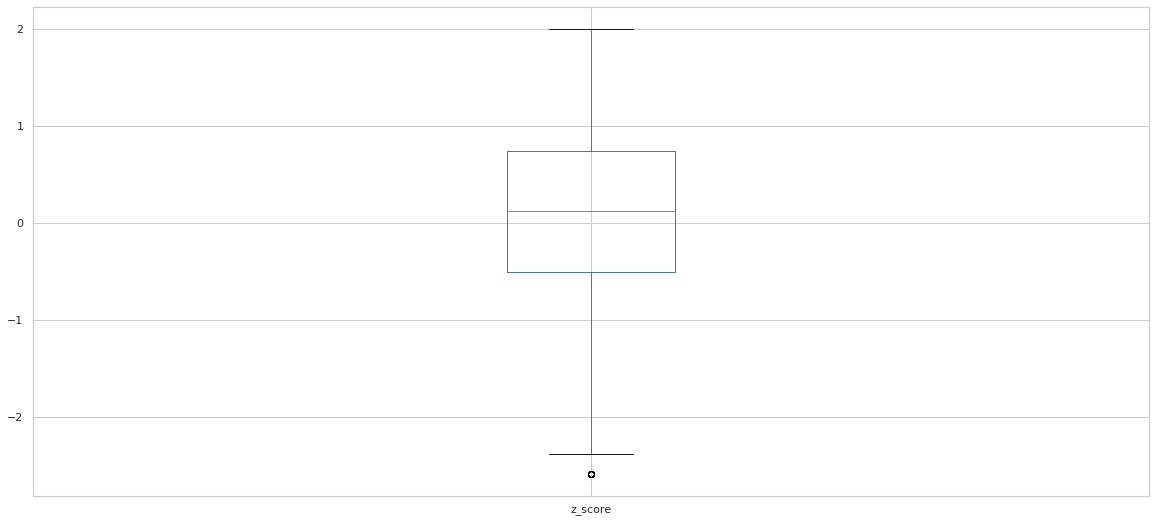

In [223]:
month_11.plot('temp', kind='box', figsize=(20,9))
# found some outlier values

Removing the outlier values

In [221]:
filtered_month_11 = month_11.loc[month_11['z_score'] > -2.5]
filtered_month_11

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date,z_score
7970,__export__.temp_log_170481_6f15e6b9,Room Admin,30-11-2018 08:18,41,Out,30,08:18,11,Day,2018-11-30 08:18:00,0.327777
7971,__export__.temp_log_170480_08363709,Room Admin,30-11-2018 08:17,41,Out,30,08:17,11,Day,2018-11-30 08:17:00,0.327777
7972,__export__.temp_log_170473_a23a18ab,Room Admin,30-11-2018 08:16,42,Out,30,08:16,11,Day,2018-11-30 08:16:00,0.536122
7973,__export__.temp_log_170472_171efaaa,Room Admin,30-11-2018 08:15,42,Out,30,08:15,11,Day,2018-11-30 08:15:00,0.536122
8534,__export__.temp_log_168794_2e630db6,Room Admin,29-11-2018 13:46,40,Out,29,13:46,11,Day,2018-11-29 13:46:00,0.119432
...,...,...,...,...,...,...,...,...,...,...,...
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,01-11-2018 00:23,40,Out,01,00:23,11,Night,2018-11-01 00:23:00,0.119432
16215,__export__.temp_log_147650_344507e9,Room Admin,01-11-2018 00:13,40,Out,01,00:13,11,Night,2018-11-01 00:13:00,0.119432
16216,__export__.temp_log_111262_7b3ed086,Room Admin,01-11-2018 00:09,39,Out,01,00:09,11,Night,2018-11-01 00:09:00,-0.088913
16217,__export__.temp_log_146101_e61c18d4,Room Admin,01-11-2018 00:07,40,Out,01,00:07,11,Night,2018-11-01 00:07:00,0.119432


<AxesSubplot:>

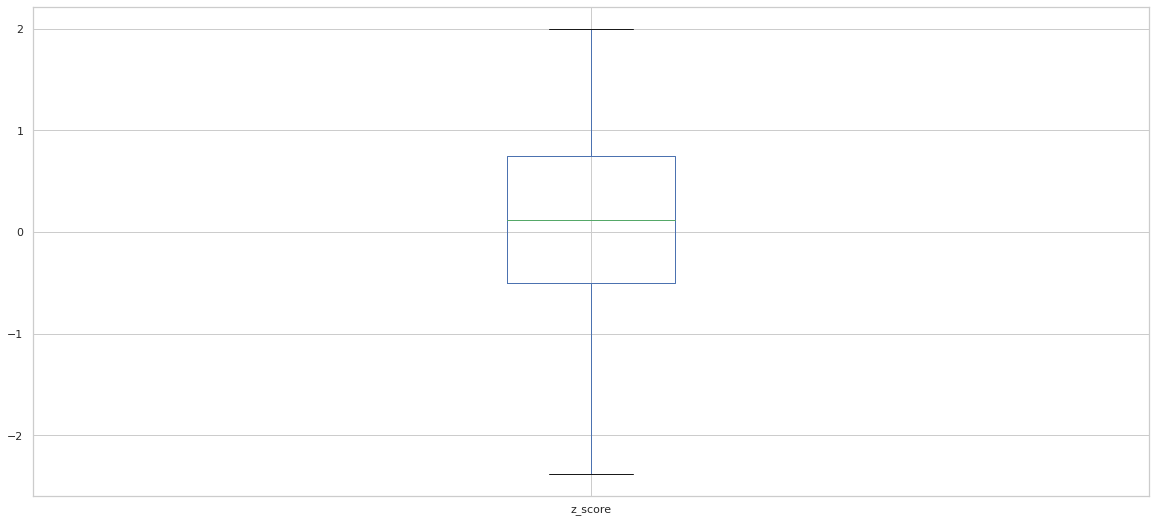

In [222]:
filtered_month_11.plot('temp', kind='box', figsize=(20,9))

For month 10

In [188]:
month_10 = df[df['month'] == '10']
month_10

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date
16219,__export__.temp_log_111124_1e903a64,Room Admin,31-10-2018 23:57,39,Out,31,23:57,10,Night,2018-10-31 23:57:00
16220,__export__.temp_log_125166_18e85606,Room Admin,31-10-2018 23:55,40,Out,31,23:55,10,Night,2018-10-31 23:55:00
16221,__export__.temp_log_135979_3f77e78b,Room Admin,31-10-2018 23:54,32,In,31,23:54,10,Night,2018-10-31 23:54:00
16222,__export__.temp_log_96071_10974210,Room Admin,31-10-2018 23:53,39,Out,31,23:53,10,Night,2018-10-31 23:53:00
16223,__export__.temp_log_119348_c6513205,Room Admin,31-10-2018 23:52,40,Out,31,23:52,10,Night,2018-10-31 23:52:00
...,...,...,...,...,...,...,...,...,...,...
52309,__export__.temp_log_37273_285166af,Room Admin,09-10-2018 04:55,38,Out,09,04:55,10,Night,2018-10-09 04:55:00
52326,__export__.temp_log_37254_500c1cc0,Room Admin,09-10-2018 04:54,38,Out,09,04:54,10,Night,2018-10-09 04:54:00
52393,__export__.temp_log_37184_bc60ed28,Room Admin,09-10-2018 04:51,39,Out,09,04:51,10,Night,2018-10-09 04:51:00
52412,__export__.temp_log_37164_4a23b007,Room Admin,09-10-2018 04:50,39,Out,09,04:50,10,Night,2018-10-09 04:50:00


In [189]:
month_10['temp'].std()

6.049819360366404

In [190]:
month_10['temp'].mean()

39.64936271906532

In [191]:
month_10['z_score'] = (month_10['temp'] - month_10['temp'].mean())/month_10['temp'].std()

<ipython-input-191-5fbe1944d256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_10['z_score'] = (month_10['temp'] - month_10['temp'].mean())/month_10['temp'].std()


In [192]:
month_10

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date,z_score
16219,__export__.temp_log_111124_1e903a64,Room Admin,31-10-2018 23:57,39,Out,31,23:57,10,Night,2018-10-31 23:57:00,-0.107336
16220,__export__.temp_log_125166_18e85606,Room Admin,31-10-2018 23:55,40,Out,31,23:55,10,Night,2018-10-31 23:55:00,0.057958
16221,__export__.temp_log_135979_3f77e78b,Room Admin,31-10-2018 23:54,32,In,31,23:54,10,Night,2018-10-31 23:54:00,-1.264395
16222,__export__.temp_log_96071_10974210,Room Admin,31-10-2018 23:53,39,Out,31,23:53,10,Night,2018-10-31 23:53:00,-0.107336
16223,__export__.temp_log_119348_c6513205,Room Admin,31-10-2018 23:52,40,Out,31,23:52,10,Night,2018-10-31 23:52:00,0.057958
...,...,...,...,...,...,...,...,...,...,...,...
52309,__export__.temp_log_37273_285166af,Room Admin,09-10-2018 04:55,38,Out,09,04:55,10,Night,2018-10-09 04:55:00,-0.272630
52326,__export__.temp_log_37254_500c1cc0,Room Admin,09-10-2018 04:54,38,Out,09,04:54,10,Night,2018-10-09 04:54:00,-0.272630
52393,__export__.temp_log_37184_bc60ed28,Room Admin,09-10-2018 04:51,39,Out,09,04:51,10,Night,2018-10-09 04:51:00,-0.107336
52412,__export__.temp_log_37164_4a23b007,Room Admin,09-10-2018 04:50,39,Out,09,04:50,10,Night,2018-10-09 04:50:00,-0.107336


<AxesSubplot:>

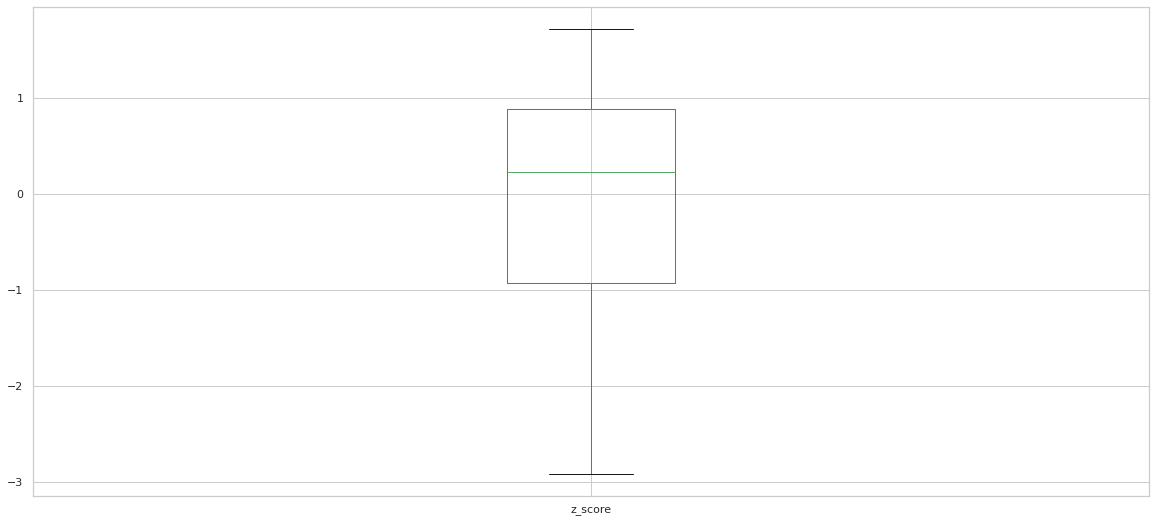

In [225]:
month_10.plot('temp', kind='box', figsize=(20,9))
# no outliers found

In [227]:
#changing type of month
df['month'] = pd.to_numeric(df['month'])

For month 9

In [196]:
month_9 = df[df['month'] == 9]
month_9

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date
52471,__export__.temp_log_36649_6c3224d5,Room Admin,30-09-2018 22:59,46,Out,30,22:59,9,Night,2018-09-30 22:59:00
52472,__export__.temp_log_36648_de4a4683,Room Admin,30-09-2018 22:57,46,Out,30,22:57,9,Night,2018-09-30 22:57:00
52473,__export__.temp_log_36647_bd03e88c,Room Admin,30-09-2018 22:55,47,Out,30,22:55,9,Night,2018-09-30 22:55:00
52474,__export__.temp_log_36645_ef1ab10c,Room Admin,30-09-2018 22:51,48,Out,30,22:51,9,Night,2018-09-30 22:51:00
52475,__export__.temp_log_36639_ebb0d0f5,Room Admin,30-09-2018 22:35,48,Out,30,22:35,9,Night,2018-09-30 22:35:00
...,...,...,...,...,...,...,...,...,...,...
95098,__export__.temp_log_113728_e9ee1ab0,Room Admin,03-09-2018 09:27,30,Out,03,09:27,9,Day,2018-09-03 09:27:00
95130,__export__.temp_log_153262_2b78857b,Room Admin,03-09-2018 09:25,33,In,03,09:25,9,Day,2018-09-03 09:25:00
95171,__export__.temp_log_109297_15e99234,Room Admin,03-09-2018 09:23,31,Out,03,09:23,9,Day,2018-09-03 09:23:00
95200,__export__.temp_log_94714_cb4fa324,Room Admin,03-09-2018 09:21,31,Out,03,09:21,9,Day,2018-09-03 09:21:00


In [197]:
month_9['temp'].mean()

36.226748923291815

In [198]:
month_9['temp'].std()

7.162493607645416

In [199]:
month_9['z_score'] = (month_9['temp'] - month_9['temp'].mean())/month_9['temp'].std()

<ipython-input-199-99a5c7448171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_9['z_score'] = (month_9['temp'] - month_9['temp'].mean())/month_9['temp'].std()


In [200]:
month_9

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date,z_score
52471,__export__.temp_log_36649_6c3224d5,Room Admin,30-09-2018 22:59,46,Out,30,22:59,9,Night,2018-09-30 22:59:00,1.364504
52472,__export__.temp_log_36648_de4a4683,Room Admin,30-09-2018 22:57,46,Out,30,22:57,9,Night,2018-09-30 22:57:00,1.364504
52473,__export__.temp_log_36647_bd03e88c,Room Admin,30-09-2018 22:55,47,Out,30,22:55,9,Night,2018-09-30 22:55:00,1.504120
52474,__export__.temp_log_36645_ef1ab10c,Room Admin,30-09-2018 22:51,48,Out,30,22:51,9,Night,2018-09-30 22:51:00,1.643736
52475,__export__.temp_log_36639_ebb0d0f5,Room Admin,30-09-2018 22:35,48,Out,30,22:35,9,Night,2018-09-30 22:35:00,1.643736
...,...,...,...,...,...,...,...,...,...,...,...
95098,__export__.temp_log_113728_e9ee1ab0,Room Admin,03-09-2018 09:27,30,Out,03,09:27,9,Day,2018-09-03 09:27:00,-0.869355
95130,__export__.temp_log_153262_2b78857b,Room Admin,03-09-2018 09:25,33,In,03,09:25,9,Day,2018-09-03 09:25:00,-0.450506
95171,__export__.temp_log_109297_15e99234,Room Admin,03-09-2018 09:23,31,Out,03,09:23,9,Day,2018-09-03 09:23:00,-0.729739
95200,__export__.temp_log_94714_cb4fa324,Room Admin,03-09-2018 09:21,31,Out,03,09:21,9,Day,2018-09-03 09:21:00,-0.729739


<AxesSubplot:>

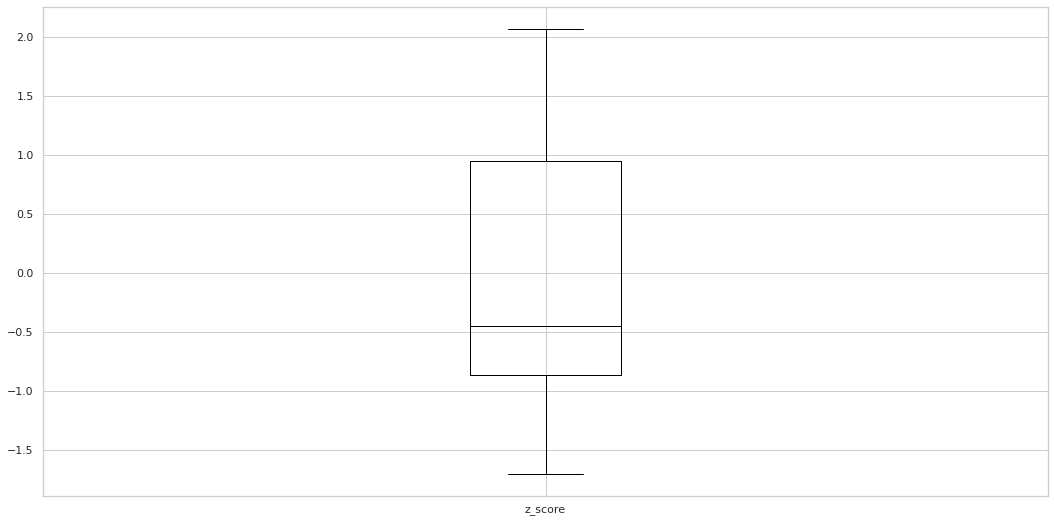

In [230]:
month_9.plot('updated_date', 'z_score', kind='box', color='black', figsize=(18,9))
#no outliers found

For month 8

In [202]:
month_8 = df[df['month'] == 8]
month_8

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date
95240,__export__.temp_log_95933_471d1fa1,Room Admin,30-08-2018 14:01,30,Out,30,14:01,8,Day,2018-08-30 14:01:00
95242,__export__.temp_log_96029_926f4002,Room Admin,30-08-2018 14:01,29,Out,30,14:01,8,Day,2018-08-30 14:01:00
95259,__export__.temp_log_90850_c5391f1b,Room Admin,30-08-2018 13:59,31,Out,30,13:59,8,Day,2018-08-30 13:59:00
95260,__export__.temp_log_93495_df2b22a7,Room Admin,30-08-2018 13:59,32,Out,30,13:59,8,Day,2018-08-30 13:59:00
95265,__export__.temp_log_88689_d9243a4d,Room Admin,30-08-2018 13:57,31,Out,30,13:57,8,Day,2018-08-30 13:57:00
...,...,...,...,...,...,...,...,...,...,...
97434,__export__.temp_log_109842_67a8ce98,Room Admin,10-08-2018 08:00,30,Out,10,08:00,8,Day,2018-08-10 08:00:00
97435,__export__.temp_log_122430_34be6442,Room Admin,02-08-2018 06:45,32,Out,02,06:45,8,Day,2018-08-02 06:45:00
97439,__export__.temp_log_99207_37407601,Room Admin,02-08-2018 06:43,31,Out,02,06:43,8,Day,2018-08-02 06:43:00
97441,__export__.temp_log_87060_117780dc,Room Admin,02-08-2018 06:43,35,Out,02,06:43,8,Day,2018-08-02 06:43:00


In [203]:
month_8['z_score'] = (month_8['temp'] - month_8['temp'].mean())/month_8['temp'].std()
month_8

<ipython-input-203-56b1c098e243>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_8['z_score'] = (month_8['temp'] - month_8['temp'].mean())/month_8['temp'].std()


,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date,z_score
95240,__export__.temp_log_95933_471d1fa1,Room Admin,30-08-2018 14:01,30,Out,30,14:01,8,Day,2018-08-30 14:01:00,-0.867874
95242,__export__.temp_log_96029_926f4002,Room Admin,30-08-2018 14:01,29,Out,30,14:01,8,Day,2018-08-30 14:01:00,-1.631446
95259,__export__.temp_log_90850_c5391f1b,Room Admin,30-08-2018 13:59,31,Out,30,13:59,8,Day,2018-08-30 13:59:00,-0.104302
95260,__export__.temp_log_93495_df2b22a7,Room Admin,30-08-2018 13:59,32,Out,30,13:59,8,Day,2018-08-30 13:59:00,0.659269
95265,__export__.temp_log_88689_d9243a4d,Room Admin,30-08-2018 13:57,31,Out,30,13:57,8,Day,2018-08-30 13:57:00,-0.104302
...,...,...,...,...,...,...,...,...,...,...,...
97434,__export__.temp_log_109842_67a8ce98,Room Admin,10-08-2018 08:00,30,Out,10,08:00,8,Day,2018-08-10 08:00:00,-0.867874
97435,__export__.temp_log_122430_34be6442,Room Admin,02-08-2018 06:45,32,Out,02,06:45,8,Day,2018-08-02 06:45:00,0.659269
97439,__export__.temp_log_99207_37407601,Room Admin,02-08-2018 06:43,31,Out,02,06:43,8,Day,2018-08-02 06:43:00,-0.104302
97441,__export__.temp_log_87060_117780dc,Room Admin,02-08-2018 06:43,35,Out,02,06:43,8,Day,2018-08-02 06:43:00,2.949985


<AxesSubplot:>

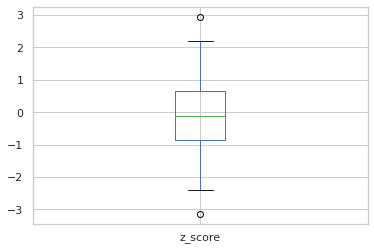

In [232]:
month_8.plot('temp', 'z_score',kind='box')
# found some outliers

Removing the outliers

<AxesSubplot:>

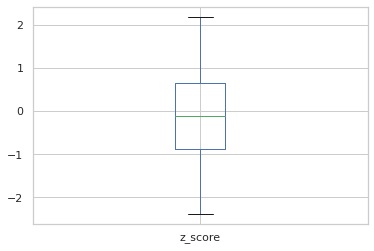

In [237]:
filtered_month_8 = month_8.loc[month_8['z_score'] > -3]
filtered_month_8 = filtered_month_8.loc[filtered_month_8['z_score'] < 2.5]
filtered_month_8
filtered_month_8.plot('temp', 'z_score',kind='box')
# no outliers remained

For month 7

In [206]:
month_7 = df[df['month'] == 7]
month_7

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date
97459,__export__.temp_log_99951_b7842b5f,Room Admin,31-07-2018 16:28,33,Out,31,16:28,7,Day,2018-07-31 16:28:00
97460,__export__.temp_log_118980_ea0ef7c4,Room Admin,31-07-2018 16:28,32,Out,31,16:28,7,Day,2018-07-31 16:28:00
97461,__export__.temp_log_120981_73e6fe87,Room Admin,31-07-2018 16:28,34,Out,31,16:28,7,Day,2018-07-31 16:28:00
97466,__export__.temp_log_151058_9c4fe651,Room Admin,31-07-2018 16:27,32,Out,31,16:27,7,Day,2018-07-31 16:27:00
97467,__export__.temp_log_113818_3897b6e2,Room Admin,31-07-2018 16:27,33,Out,31,16:27,7,Day,2018-07-31 16:27:00
97468,__export__.temp_log_124234_a7ffb940,Room Admin,31-07-2018 16:26,32,Out,31,16:26,7,Day,2018-07-31 16:26:00
97469,__export__.temp_log_129218_51da6310,Room Admin,31-07-2018 16:26,33,Out,31,16:26,7,Day,2018-07-31 16:26:00
97470,__export__.temp_log_136208_18493958,Room Admin,31-07-2018 16:26,30,Out,31,16:26,7,Day,2018-07-31 16:26:00
97472,__export__.temp_log_146082_d0f848a5,Room Admin,31-07-2018 16:25,34,Out,31,16:25,7,Day,2018-07-31 16:25:00
97477,__export__.temp_log_98392_044d26a8,Room Admin,31-07-2018 16:24,32,Out,31,16:24,7,Day,2018-07-31 16:24:00


In [207]:
month_7['z_score'] = (month_7['temp'] - month_7['temp'].mean())/month_7['temp'].std()
month_7

<ipython-input-207-ed95354fa25a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_7['z_score'] = (month_7['temp'] - month_7['temp'].mean())/month_7['temp'].std()


,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date,z_score
97459,__export__.temp_log_99951_b7842b5f,Room Admin,31-07-2018 16:28,33,Out,31,16:28,7,Day,2018-07-31 16:28:00,1.192488
97460,__export__.temp_log_118980_ea0ef7c4,Room Admin,31-07-2018 16:28,32,Out,31,16:28,7,Day,2018-07-31 16:28:00,0.195134
97461,__export__.temp_log_120981_73e6fe87,Room Admin,31-07-2018 16:28,34,Out,31,16:28,7,Day,2018-07-31 16:28:00,2.189841
97466,__export__.temp_log_151058_9c4fe651,Room Admin,31-07-2018 16:27,32,Out,31,16:27,7,Day,2018-07-31 16:27:00,0.195134
97467,__export__.temp_log_113818_3897b6e2,Room Admin,31-07-2018 16:27,33,Out,31,16:27,7,Day,2018-07-31 16:27:00,1.192488
97468,__export__.temp_log_124234_a7ffb940,Room Admin,31-07-2018 16:26,32,Out,31,16:26,7,Day,2018-07-31 16:26:00,0.195134
97469,__export__.temp_log_129218_51da6310,Room Admin,31-07-2018 16:26,33,Out,31,16:26,7,Day,2018-07-31 16:26:00,1.192488
97470,__export__.temp_log_136208_18493958,Room Admin,31-07-2018 16:26,30,Out,31,16:26,7,Day,2018-07-31 16:26:00,-1.799573
97472,__export__.temp_log_146082_d0f848a5,Room Admin,31-07-2018 16:25,34,Out,31,16:25,7,Day,2018-07-31 16:25:00,2.189841
97477,__export__.temp_log_98392_044d26a8,Room Admin,31-07-2018 16:24,32,Out,31,16:24,7,Day,2018-07-31 16:24:00,0.195134


<AxesSubplot:>

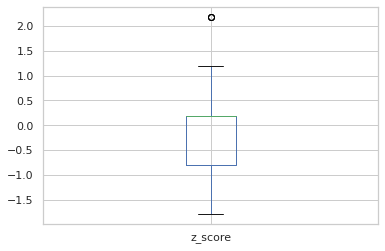

In [208]:
month_7.plot('temp', 'z_score', kind='box')
# found some outliers

In [209]:
# removing outliers
filtered_month_7 = month_7.loc[month_7['z_score'] < 2]
filtered_month_7

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date,z_score
97459,__export__.temp_log_99951_b7842b5f,Room Admin,31-07-2018 16:28,33,Out,31,16:28,7,Day,2018-07-31 16:28:00,1.192488
97460,__export__.temp_log_118980_ea0ef7c4,Room Admin,31-07-2018 16:28,32,Out,31,16:28,7,Day,2018-07-31 16:28:00,0.195134
97466,__export__.temp_log_151058_9c4fe651,Room Admin,31-07-2018 16:27,32,Out,31,16:27,7,Day,2018-07-31 16:27:00,0.195134
97467,__export__.temp_log_113818_3897b6e2,Room Admin,31-07-2018 16:27,33,Out,31,16:27,7,Day,2018-07-31 16:27:00,1.192488
97468,__export__.temp_log_124234_a7ffb940,Room Admin,31-07-2018 16:26,32,Out,31,16:26,7,Day,2018-07-31 16:26:00,0.195134
97469,__export__.temp_log_129218_51da6310,Room Admin,31-07-2018 16:26,33,Out,31,16:26,7,Day,2018-07-31 16:26:00,1.192488
97470,__export__.temp_log_136208_18493958,Room Admin,31-07-2018 16:26,30,Out,31,16:26,7,Day,2018-07-31 16:26:00,-1.799573
97477,__export__.temp_log_98392_044d26a8,Room Admin,31-07-2018 16:24,32,Out,31,16:24,7,Day,2018-07-31 16:24:00,0.195134
97479,__export__.temp_log_141810_5b70b2bc,Room Admin,31-07-2018 16:23,31,In,31,16:23,7,Day,2018-07-31 16:23:00,-0.802219
97480,__export__.temp_log_124760_fd9e2f58,Room Admin,31-07-2018 16:23,30,In,31,16:23,7,Day,2018-07-31 16:23:00,-1.799573


In [ ]:
filtered_month_7.plot('temp', 'z_score', kind='box')
# no outliers remaining

Filtered data


In [214]:
newdf = pd.concat([filtered_month_7, filtered_month_8, month_9, month_10, filtered_month_11, month_12])
newdf

,id,room_id/id,noted_date,temp,out/in,date,time,month,day_time,updated_date,z_score
97459,__export__.temp_log_99951_b7842b5f,Room Admin,31-07-2018 16:28,33,Out,31,16:28,7,Day,2018-07-31 16:28:00,1.192488
97460,__export__.temp_log_118980_ea0ef7c4,Room Admin,31-07-2018 16:28,32,Out,31,16:28,7,Day,2018-07-31 16:28:00,0.195134
97466,__export__.temp_log_151058_9c4fe651,Room Admin,31-07-2018 16:27,32,Out,31,16:27,7,Day,2018-07-31 16:27:00,0.195134
97467,__export__.temp_log_113818_3897b6e2,Room Admin,31-07-2018 16:27,33,Out,31,16:27,7,Day,2018-07-31 16:27:00,1.192488
97468,__export__.temp_log_124234_a7ffb940,Room Admin,31-07-2018 16:26,32,Out,31,16:26,7,Day,2018-07-31 16:26:00,0.195134
...,...,...,...,...,...,...,...,...,...,...,...
5855,__export__.temp_log_176748_60bb11e0,Room Admin,03-12-2018 07:05,26,In,03,07:05,12,Day,2018-12-03 07:05:00,-1.674377
6202,__export__.temp_log_175726_bb4d36c3,Room Admin,02-12-2018 19:55,38,Out,02,19:55,12,Night,2018-12-02 19:55:00,0.776570
6203,__export__.temp_log_175727_4ebae5c4,Room Admin,02-12-2018 19:54,38,Out,02,19:54,12,Night,2018-12-02 19:54:00,0.776570
6206,__export__.temp_log_175716_a92efecb,Room Admin,02-12-2018 19:51,38,Out,02,19:51,12,Night,2018-12-02 19:51:00,0.776570
